In [ ]:
# Cargar autenticación de Google para poder cargar los archivos
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
id = '1NTzqUa52i-pZ5KXN5XLz9Qn32ejikxJE'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('alerts_dataset.csv')  
df = pd.read_csv('alerts_dataset.csv')

In [ ]:
df = df.dropna()

In [ ]:
df['src_ip'] = df['src_ip'].astype('str')
df['infected_host'] = df['infected_host'].astype('str') 
df['dest_ip'] = df['dest_ip'].astype('str')

In [ ]:
le = preprocessing.LabelEncoder()
#df['alert_type'] = le.fit_transform(df.alert_type.values)
df['src_ip'] = le.fit_transform(df.src_ip.values)
df['dest_ip'] = le.fit_transform(df.dest_ip.values)
df['infected_host'] = le.fit_transform(df.infected_host.values)
df['step'] = le.fit_transform(df.step.values)

In [ ]:
df = df.drop(['alert_id','alert_type'], axis=1)

In [ ]:
X = df.drop('step', axis=1)
#y = label_binarize(df['step'], classes=[0, 1, 2, 3, 4])
y = df['step']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42, stratify=y)

In [ ]:
#roc auc
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize

clf = DecisionTreeClassifier(random_state=42, min_samples_split=23, min_samples_leaf=5)
y_pred = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

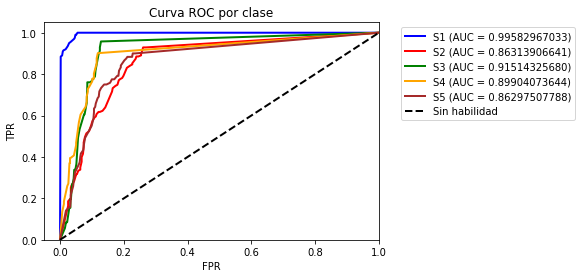

In [ ]:
import matplotlib.pyplot as plt
from itertools import cycle

target_names = ['S1', 'S2', 'S3', 'S4', 'S5']

lw=2
y_ts = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = 5

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_ts[:, i], pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'orange', 'brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='%s (AUC = %0.11f)' % (target_names[i],roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw, label='Sin habilidad')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC por clase')
plt.legend(bbox_to_anchor=(1.05, 1))
#plt.show()
plt.savefig('roc', format='png', dpi=1000, bbox_inches='tight')

In [ ]:
!pip install --upgrade gupload

# Authenticate and create the PyDrive client.
auth.authenticate_user()

!gupload --to '1wJNHfUVkFzFvSl3HpcLSiHYFcclsXveQ' roc